<a href="https://colab.research.google.com/github/Poovarasan0368/Mobile_Price_Range_Prediction/blob/main/Mobile_Price_Range_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile_Price_Range_Prediction </u></b>

**Author:** *POOVARASAN S*

**Email:**  shipfriend0368@gmail.com

**Github Link:** https://github.com/Poovarasan0368/Mobile_Price_Range_Prediction

**Google Drive Link:** https://drive.google.com/drive/folders/1a5LTr-DFCfkvf6cl2Z2-rqnAlvy04_43?usp=share_link

## <b> Problem Description </b>

###In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg-RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

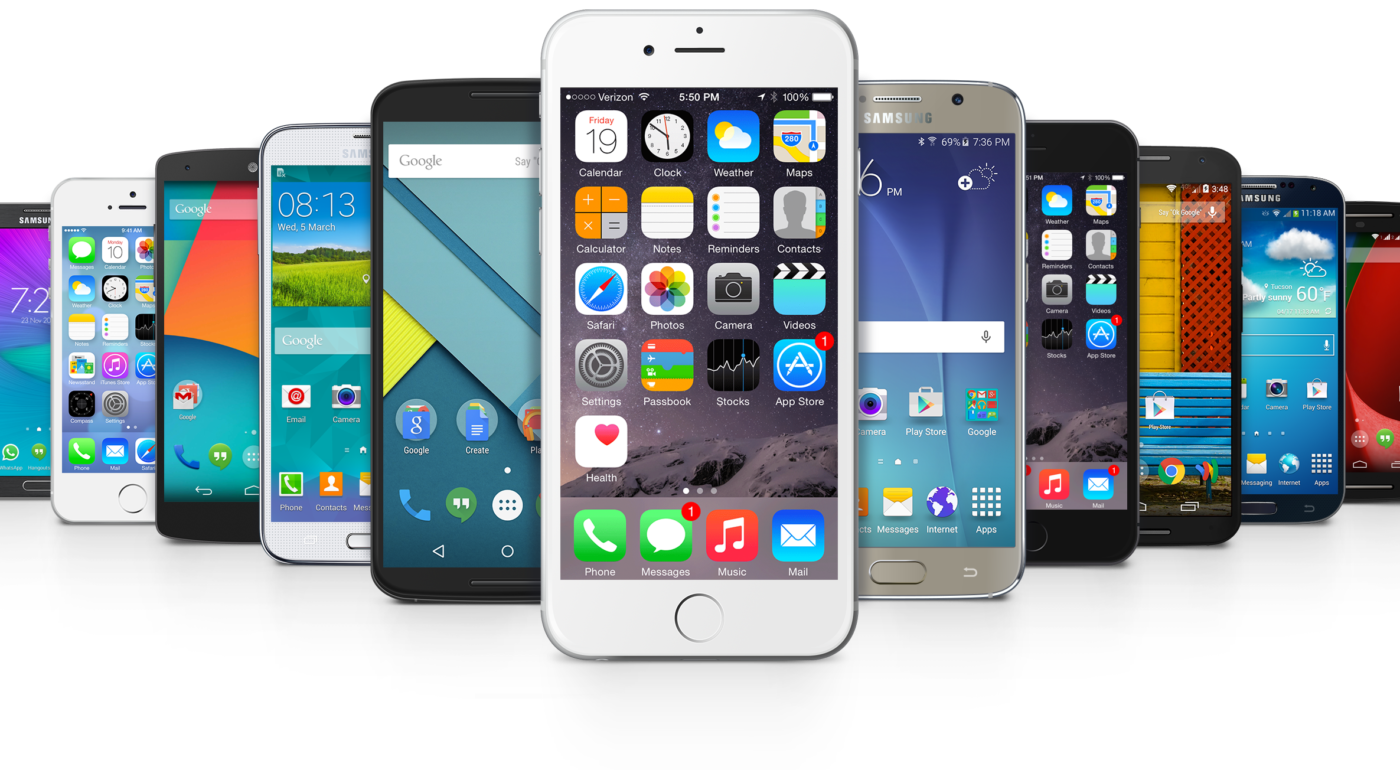


## **Data Description**


* Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are
* Three_g - Has 3G or not
* Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost), 3(very high cost)

# **Import packages and Datas**

In [ ]:
# Import Packages 

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting The Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Reading The Data

Mobile_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mobile/data_mobile_price_range.csv')

## **Understanding Datasets**

In [ ]:
# Head of the dataframe 
Mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Tail of the dataframe 
Mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# Shape of the Dataframe

Mobile_df.shape

(2000, 21)

In [ ]:
# informaton About Data frame 

Mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Discreption of Dataframe

Mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# unique values in Data frame 

Mobile_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# **Handling the data sets**

In [ ]:
# checking the null values in data frame 

null = Mobile_df.isnull().sum().sum()
print(f'Null values present in dataframe',null)

Null values present in dataframe 0


In [ ]:
# Checking Duplicate values 

Dup = Mobile_df.duplicated().sum()
print(f'Duplicate values present in dataframe',Dup)

Duplicate values present in dataframe 0


In [ ]:
# print columns names

Mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# **Exploratory Data Analysis**

## **Distribution of price range**

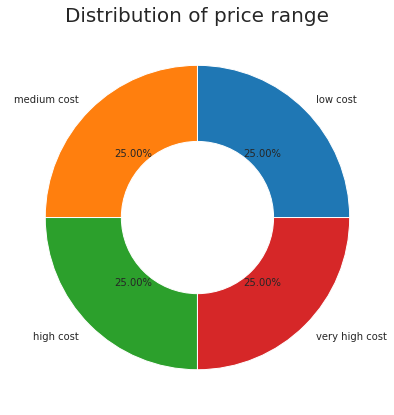

In [ ]:
# check price range distribution

labels = ["low cost", "medium cost", "high cost", "very high cost"]
plt.figure(figsize=(7,7))
plt.pie(Mobile_df['price_range'].value_counts(), labels = labels, autopct='%1.2f%%')
circle = plt.Circle( (0,0), 0.50, color='white')
k = plt.gcf()
k.gca().add_artist(circle)
plt.title('Distribution of price range', fontsize= 20);

All the prices are equally distributed

In [ ]:
catagory_variables = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
variable_1 = ['clock_speed','fc','pc','talk_time','sc_h','sc_w', 'm_dep','int_memory']
variable_2 = ['battery_power','px_height','px_width','ram']

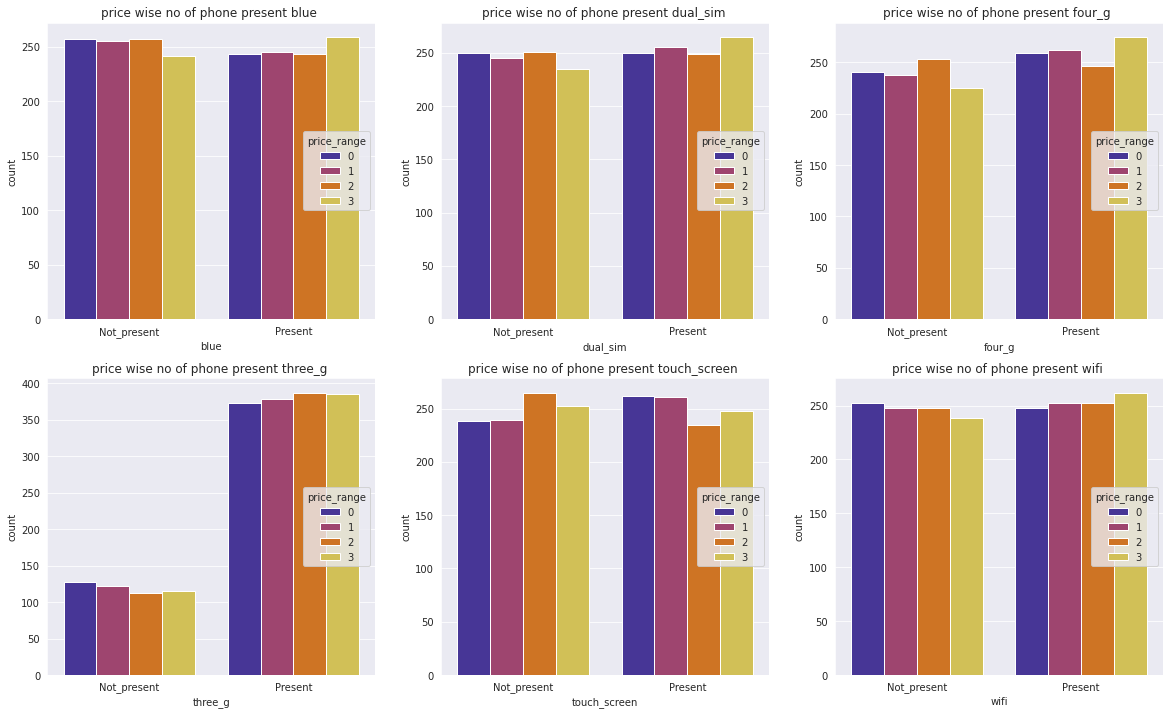

In [ ]:
# Visulaizing catagory variables 

plt.figure(figsize=(20,12))
for index, i in enumerate(catagory_variables):
  plt.subplot(2,3,index+1)
  ax = sns.countplot( data = Mobile_df, palette='CMRmap', hue="price_range" , x=i)
  xtick=[0,1]
  label=['Not_present','Present']
  plt.xticks(xtick,label)
  sns.move_legend(ax, "center right")
  plt.title(f'price wise no of phone present {i} ')

With the exception of 3G, all of the categories (bluetooth, Dual-SIM, 4G, touch screen, and Wifi) are distributed equally based on their existence rather than absence. in the 3G category, 27% of mobile phones do not have 3G, but 63% of phones do have the 3G option.

## **Visulazing distrbution of clock_speed, fc, pc, talk_time, sc_h, sc_w, m_dep, int_memory by price range wise**

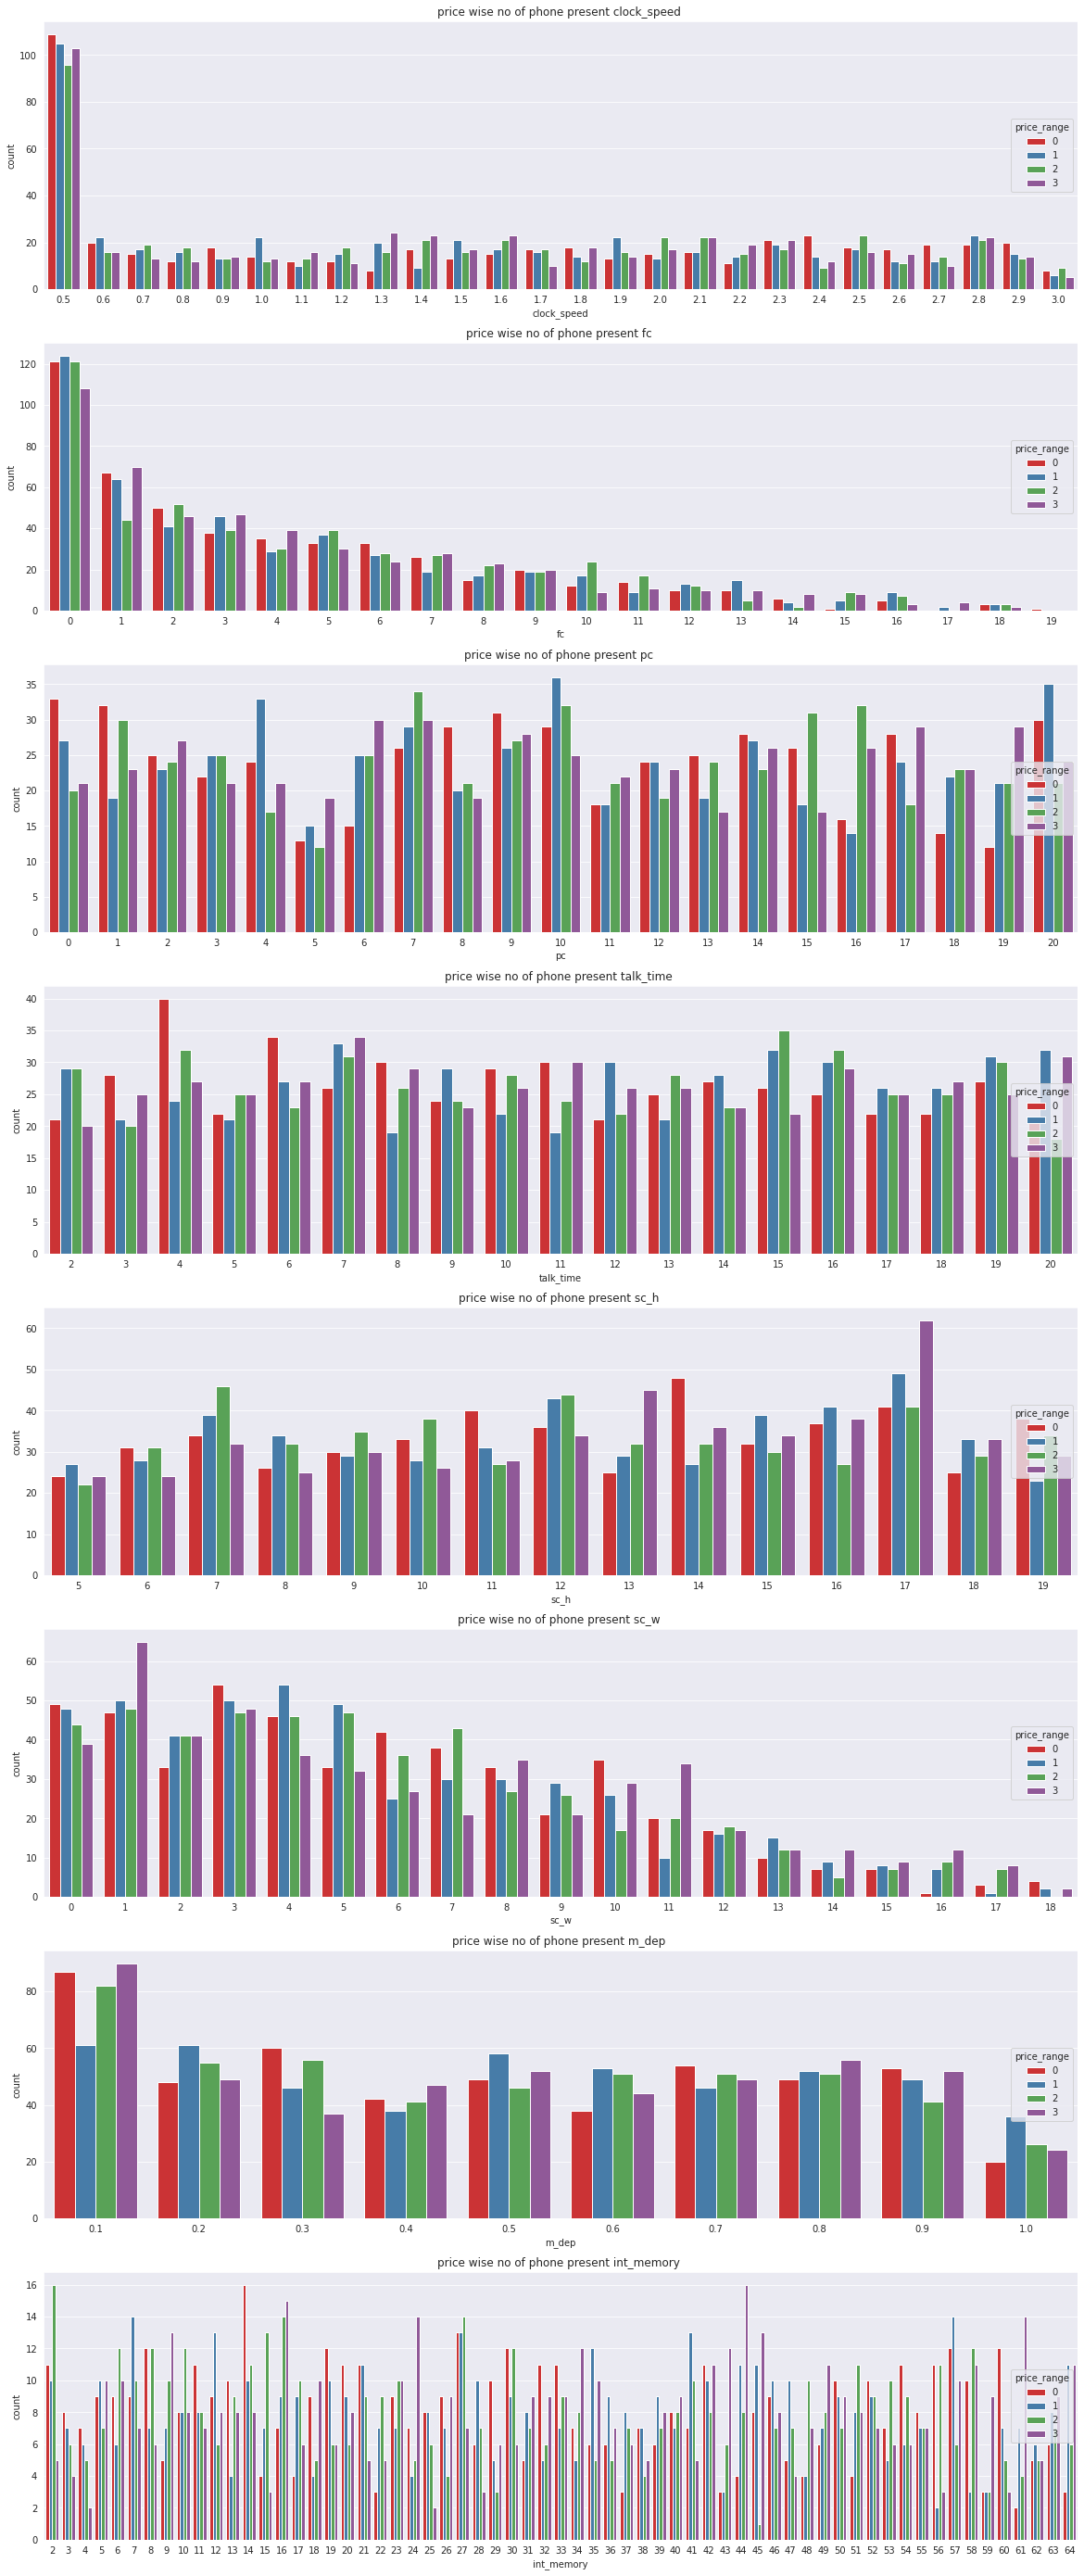

In [ ]:
plt.figure(figsize=(20,50))
for index, i in enumerate(variable_1):
  plt.subplot(8,1,index+1)
  ax = sns.countplot( data = Mobile_df, palette="Set1", hue="price_range" , x=i)
  sns.move_legend(ax, "center right")
  plt.title(f'price wise no of phone present {i} ')

The columns for clock speed, front camera, screen width, and mobile depth are left skewed in the above chart. Other columns (Primary camera, Talk time, and internal memory) have zero-skew, and the screen height is slightly right-skewed.

## **Visulazing distrbution of Battery, pixles and ram columns by price range wise**

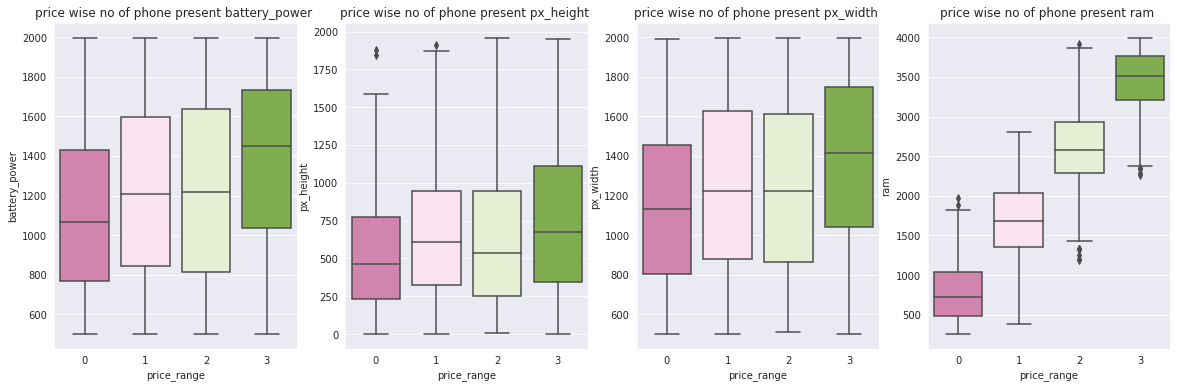

In [ ]:
plt.figure(figsize=(20,6))
for index, i in enumerate(variable_2):
  plt.subplot(1,4,index+1)
  ax = sns.boxplot(data = Mobile_df, palette="PiYG", x ="price_range" , y =i)
  plt.title(f'price wise no of phone present {i} ')

According to the above chart, the expensive phone has a large battery life, high-performance RAM, and large pixels both in width and height. High- and medium-priced mobiles almost have the same levels of battery life, RAM, and pixels, although they perform less well than very expensive devices. Compared to the other three categories, low-cost mobile devices' performance is very poor.

## **Distrbustion of Mobile Weight**

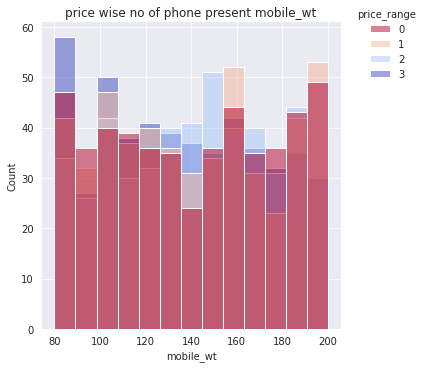

In [ ]:
ax = sns.displot(data = Mobile_df, palette="coolwarm_r", hue ="price_range" , x = 'mobile_wt' )
sns.move_legend(ax, "upper right")
plt.title(f'price wise no of phone present mobile_wt')
plt.show()

According to the above chart, phones that weigh between 80 and 100g are very expensive. and the phone, which weights between 160 and 200g are expensive.

## **Distribustion of N_core**

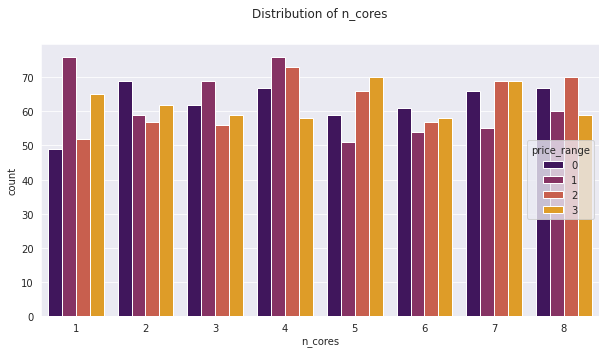

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.rcParamsDefault
ax = sns.countplot(data = Mobile_df, palette="inferno", hue ="price_range" , x = 'n_cores')
sns.move_legend(ax, "center right")
plt.title('Distribution of n_cores',  y= 1.08)
plt.show()

The above chart shows the phone which have 4 N_Cores highly present in data sets but its has minimaly sold in very high cost, But the phone which has 5 N_Core has highly sold in Very high cost. and this N_core column almost Zero-Skewed.


#**Checking outlayers**

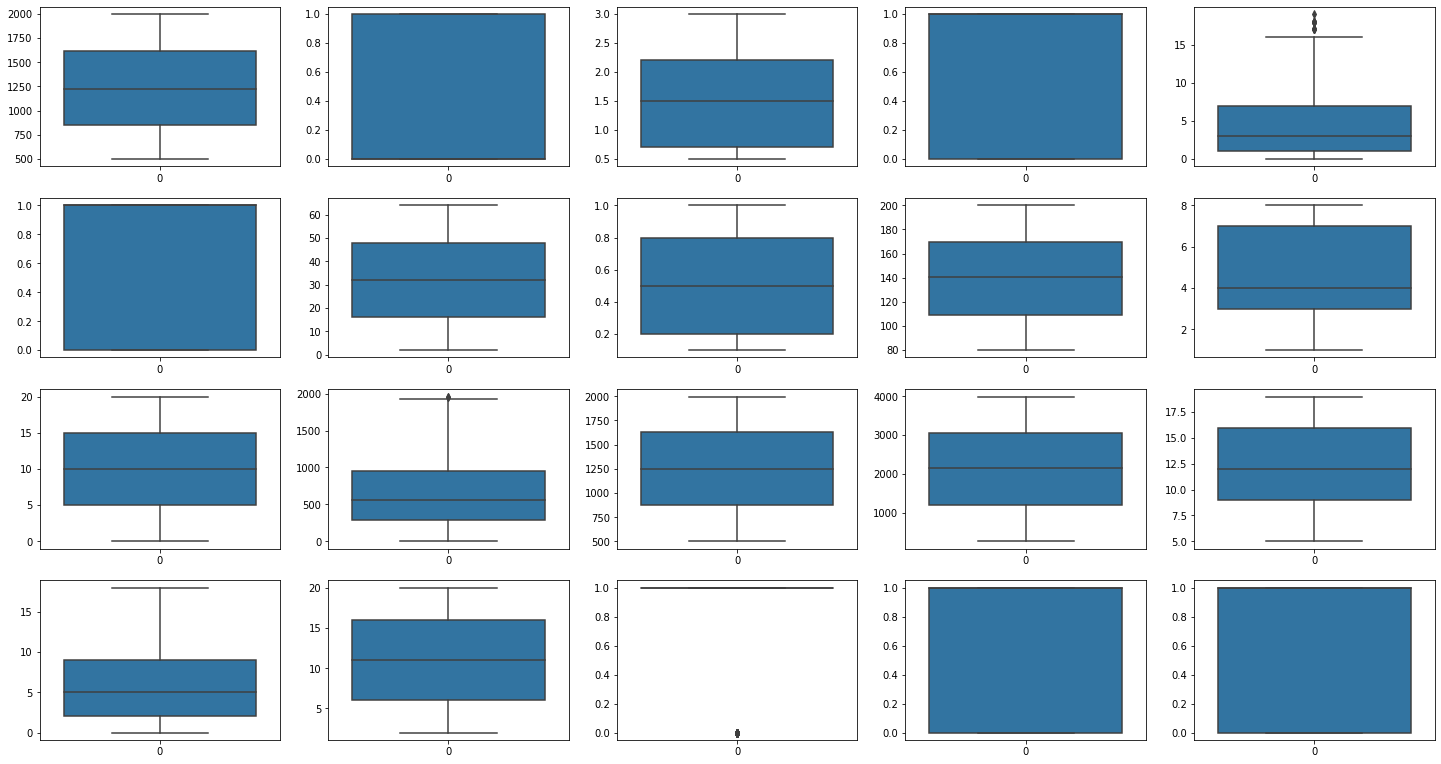

In [ ]:
outlayer = Mobile_df.drop(columns=['price_range'], axis=1)

plt.figure(figsize=(25,17))
for index,item in enumerate(outlayer.columns):
  plt.subplot(5,5,index+1)
  sns.boxplot(Mobile_df[item])
plt.show()

The above chart shows outlayer present in each columns, the Front camera and Pixel Height columns has outlayesrs we have the remove that.

## **Outlayer Treatment**

In [ ]:
# treating 'fc' column outlayers
Q1 = Mobile_df['fc'].quantile(0.25)
Q3 = Mobile_df['fc'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-8.0 16.0


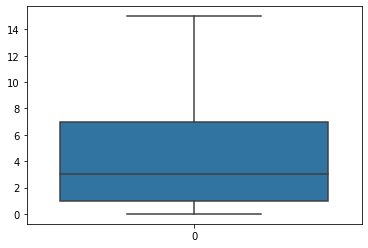

In [ ]:
Mobile_df = Mobile_df[Mobile_df['fc']< Upper_Whisker]
sns.boxplot(Mobile_df['fc'])
plt.show()

In [ ]:
# treating 'px_height' column outlayers

Q1 = Mobile_df['px_height'].quantile(0.25)
Q3 = Mobile_df['px_height'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-710.25 1935.75


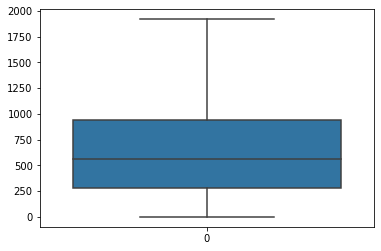

In [ ]:
Mobile_df = Mobile_df[Mobile_df['px_height']< Upper_Whisker]
sns.boxplot(Mobile_df['px_height'])
plt.show()

# **Correlation between the Variables**

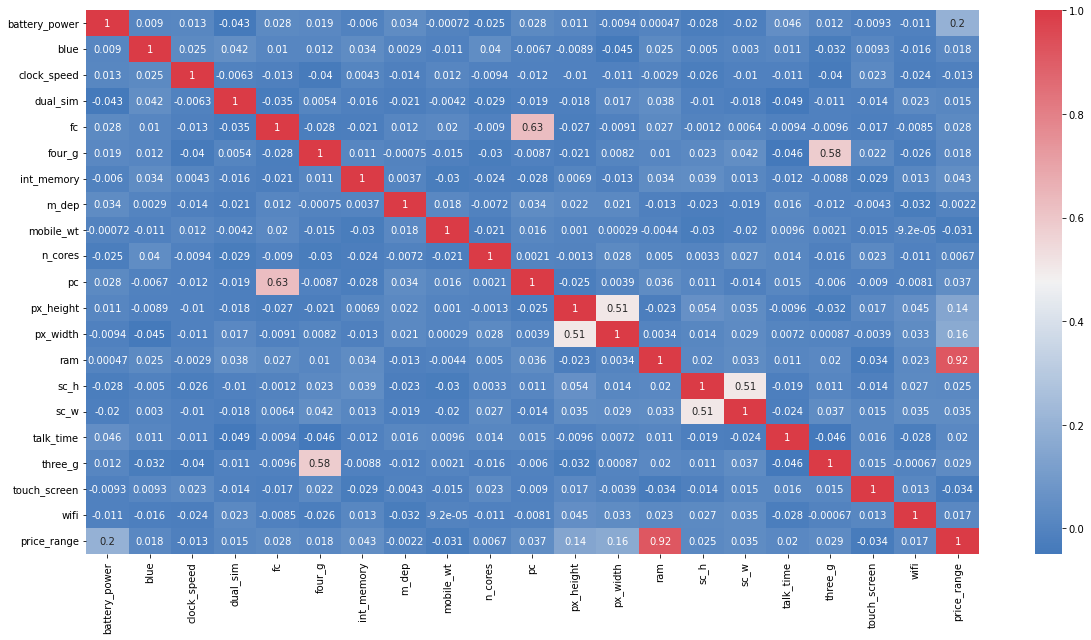

In [ ]:
# Finding correlation 

plt.figure(figsize=(20,10))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(Mobile_df.corr(),cmap=cmap,annot=True)
plt.show()

According to the heatmap above, the columns 3g, 4g, fc, and pc are slightly correlated, but ram and price range are highly correlated. However, since the goal of this project is to predict price range, the correlation between ram and price range has no affect on the model. so we leave this.

# **Feature Selection**

In [ ]:
# Declare independent and dependent variables 

ind_var = Mobile_df.drop(columns=['price_range'], axis=1)
dep_var = Mobile_df['price_range']

In [ ]:
# finding the best features 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best = SelectKBest(score_func = chi2, k=15)
best_fit = best.fit(ind_var,dep_var)
best_feature =pd.concat([(pd.DataFrame(ind_var.columns)),(pd.DataFrame(best_fit.scores_))],axis=1) 
best_feature.columns = ['features','scores'] 
best_feature.sort_values('scores',ascending=False)

,features,scores
13,ram,910359.660493
11,px_height,15678.215084
0,battery_power,13629.259339
12,px_width,9206.233345
8,mobile_wt,96.052215
6,int_memory,80.995162
15,sc_w,15.350914
16,talk_time,11.913767
4,fc,10.915930
10,pc,10.278475


the features ram, px_height, batterypower, px_width are has very high scores.

In [ ]:
# choosing best features for analysis
X = Mobile_df.drop(columns=['price_range','touch_screen','clock_speed','four_g','dual_sim','blue','three_g','m_dep','wifi'], axis=1)
Y = Mobile_df['price_range']

# **Test and Train Data Spliting**

When machine learning algorithms are used to make predictions on data that was not used to train the model, the train-test split process is used to measure their performance.
It's a quick and simple technique that allows you to compare the performance of different machine learning algorithms for your predictive modelling problem. Although the process is straightforward to use and interpret, there are occasions when it should not be utilised, such as when you have a tiny dataset or when further configuration is required, such as when it is used for classification and the dataset is not balanced.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20,random_state=42,stratify=Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1564, 12)
(392, 12)
(1564,)
(392,)


#**Scalling** 

This indicates that we are changing our data to meet a predetermined scale, such as 0-100 or 0-1. Scaling our data is necessary when using techniques like k-nearest neighbours (KNN).

In [ ]:
# scalling the datas

from sklearn.preprocessing import StandardScaler
scalling = StandardScaler()

X_train = scalling.fit_transform(X_train)
X_test = scalling.transform(X_test)

#**Models**

Predictive modelling is a technique for using data modelling to predict outcomes. It's one of the best ways for a business to predict the future and develop relevant strategies. This technique has a high rate of accuracy and is widely used despite its drawbacks.

## **Decision Tree Classifier**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

classifier_Decision = DecisionTreeClassifier()
classifier_Decision.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
classifier_Decision_model_score = classifier_Decision.score(X_train,Y_train)
classifier_Decision_model_score

1.0

In [ ]:
Y_predi_test = classifier_Decision.predict(X_test)
Y_predi_train = classifier_Decision.predict(X_train)

In [ ]:
classifier_Decision_train_score = accuracy_score(Y_train, Y_predi_train)
classifier_Decision_train_score

1.0

In [ ]:
classifier_Decision_test_score = accuracy_score(Y_test, Y_predi_test)
classifier_Decision_test_score

0.8596938775510204

In [ ]:
print(classification_report(Y_test, Y_predi_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        99
           1       0.80      0.79      0.80        97
           2       0.81      0.87      0.84        98
           3       0.94      0.90      0.92        98

    accuracy                           0.86       392
   macro avg       0.86      0.86      0.86       392
weighted avg       0.86      0.86      0.86       392



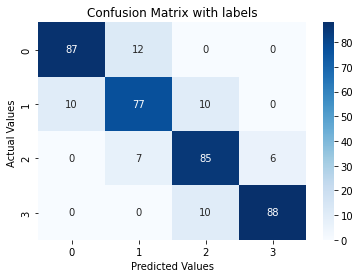

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_predi_test)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [ ]:
important_feature = pd.DataFrame({'Feature' : list(X.columns),'Feature Importance' : classifier_Decision.feature_importances_})
important_feature = important_feature.sort_values(by=['Feature Importance'],ascending=False)
important_feature

,Feature,Feature Importance
8,ram,0.650248
0,battery_power,0.107316
7,px_width,0.088487
6,px_height,0.086409
1,fc,0.012730
2,int_memory,0.010985
5,pc,0.009932
3,mobile_wt,0.009448
9,sc_h,0.008949
4,n_cores,0.007564


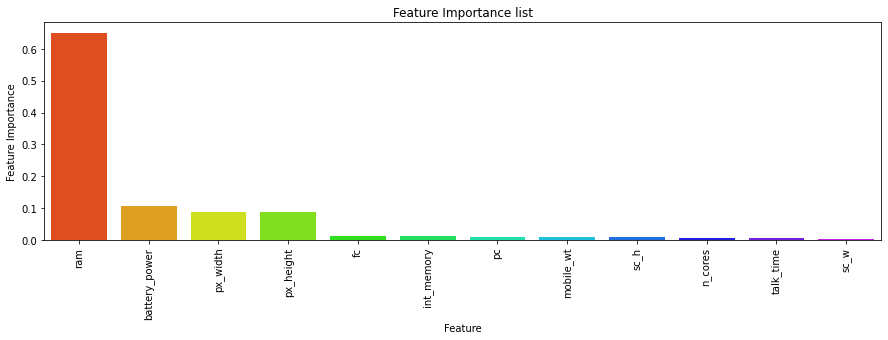

In [ ]:
fig,ax=plt.subplots(figsize=(15,4))
sns.barplot(data = important_feature, palette="gist_rainbow", x='Feature', y='Feature Importance')
ax.set(title='Feature Importance list')
plt.xticks(rotation=90)
plt.show()

**Results:**


1.   The overall accuracy score on our test data is 85%.
2.   Prediction accuracy on Low Cost is 90%.
3.   Prediction accuracy on Medium Cost is 80%.
4.   Prediction accuracy on High Cost is 81%.
5.   Prediction accuracy on Very High Cost is 94%. 

As a result, we can see that the Decision Tree Classifier has performed good overall,best are low cost and Very High Cost. but in confusion matrix its performance not good in medium cost, and this model trend to overfit.

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20,random_state=42,stratify=Y)
classifier_Random = RandomForestClassifier()
classifier_Random.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
classifier_Random_model_score = classifier_Random.score(X_train,Y_train)
classifier_Random_model_score

1.0

In [ ]:
Y_predi_test = classifier_Random.predict(X_test)
Y_predi_train = classifier_Random.predict(X_train)

In [ ]:
classifier_Random_train_score = accuracy_score(Y_train, Y_predi_train)
classifier_Random_train_score

1.0

In [ ]:
classifier_Random_test_score = accuracy_score(Y_test, Y_predi_test)
classifier_Random_test_score

0.9132653061224489

In [ ]:
print(classification_report(Y_test, Y_predi_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        99
           1       0.91      0.84      0.87        97
           2       0.85      0.92      0.88        98
           3       0.97      0.93      0.95        98

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392



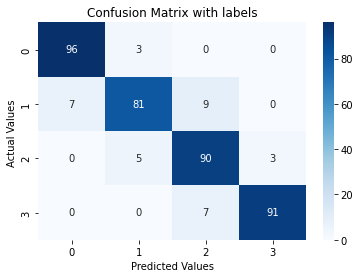

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_predi_test)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [ ]:
important_feature = pd.DataFrame({'Feature' : list(X_train.columns),'Feature Importance' : classifier_Random.feature_importances_})
important_feature = important_feature.sort_values(by=['Feature Importance'],ascending=False)
important_feature

,Feature,Feature Importance
8,ram,0.541486
0,battery_power,0.084618
7,px_width,0.062896
6,px_height,0.061288
3,mobile_wt,0.041576
2,int_memory,0.038952
11,talk_time,0.031384
5,pc,0.030440
9,sc_h,0.029502
10,sc_w,0.028716


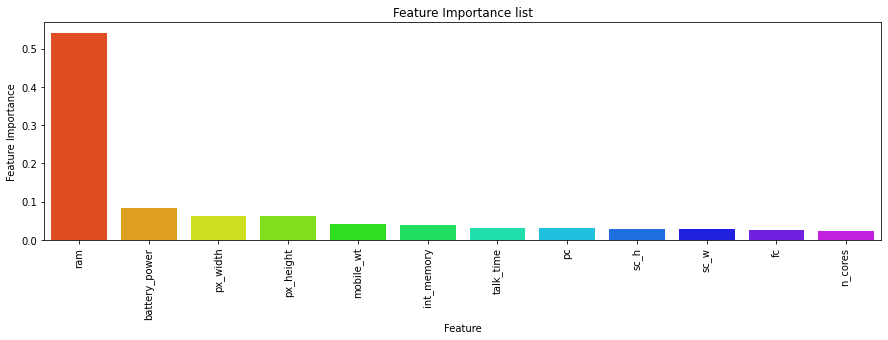

In [ ]:
fig,ax=plt.subplots(figsize=(15,4))
sns.barplot(data = important_feature, palette="gist_rainbow", x='Feature', y='Feature Importance')
ax.set(title='Feature Importance list')
plt.xticks(rotation=90)
plt.show()

**Results:**


1.   The overall accuracy score on our test data is 91%.
2.   Prediction accuracy on Low Cost is 93%.
3.   Prediction accuracy on Medium Cost is 91%.
4.   Prediction accuracy on High Cost is 85%.
5.   Prediction accuracy on Very High Cost is 97%. 

As a result, we can see that the Random Forest Classifier has performed good overall, and best in Low Cost and Very High Cost. this model also trend to overfit.

## **Hyperparameter tuning with Random forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[ 500, 700],
          'max_depth':[None, 20, 40],
          'min_samples_split':[2,6],
          'max_leaf_nodes':[None]
          }

In [ ]:
Random = RandomForestClassifier()
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20,random_state=42,stratify=Y)
clsr_GSCV = GridSearchCV(Random, params, scoring='accuracy', cv=5)
clsr_GSCV.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 20, 40], 'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6],
                         'n_estimators': [500, 700]},
             scoring='accuracy')

In [ ]:
clsr_GSCV.best_params_

{'max_depth': 20,
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 700}

In [ ]:
clsr_GSCV.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=700)

In [ ]:
clsr_GSCV.best_score_

0.8972388955582232

In [ ]:
tunned_rf = clsr_GSCV.best_estimator_
tunned_rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=700)

In [ ]:
tunned_rf_model_score = tunned_rf.score(X_train,Y_train)
tunned_rf_model_score

1.0

In [ ]:
Y_predi_test = tunned_rf.predict(X_test)
Y_predi_train = tunned_rf.predict(X_train)

In [ ]:
tunned_rf_train_score = accuracy_score(Y_train, Y_predi_train)
tunned_rf_train_score

1.0

In [ ]:
tunned_rf_test_score = accuracy_score(Y_test, Y_predi_test)
tunned_rf_test_score

0.9183673469387755

In [ ]:
print(classification_report(Y_test, Y_predi_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.88      0.89      0.88        97
           2       0.90      0.89      0.89        98
           3       0.97      0.94      0.95        98

    accuracy                           0.92       392
   macro avg       0.92      0.92      0.92       392
weighted avg       0.92      0.92      0.92       392



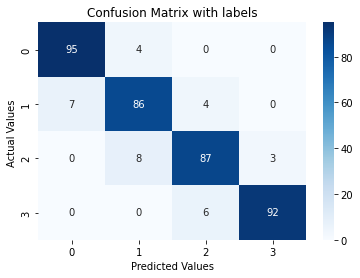

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_predi_test)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [ ]:
important_feature = pd.DataFrame({'Feature' : list(X_train.columns),'Feature Importance' : tunned_rf.feature_importances_})
important_feature = important_feature.sort_values(by=['Feature Importance'],ascending=False)
important_feature

,Feature,Feature Importance
8,ram,0.543604
0,battery_power,0.083696
6,px_height,0.063702
7,px_width,0.063620
3,mobile_wt,0.040662
2,int_memory,0.038363
11,talk_time,0.030420
5,pc,0.029963
10,sc_w,0.028956
9,sc_h,0.028734


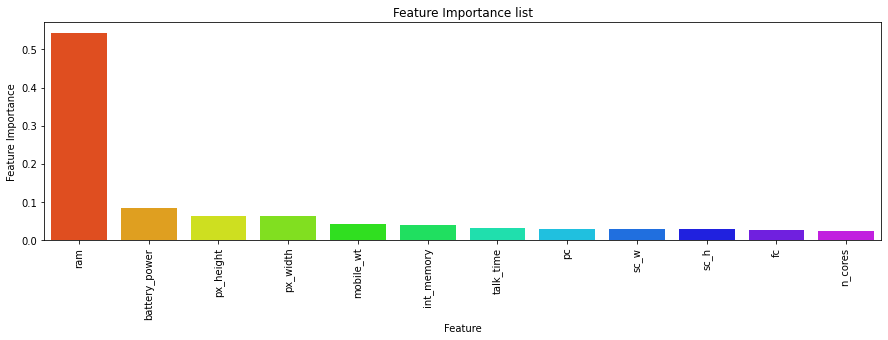

In [ ]:
fig,ax=plt.subplots(figsize=(15,4))
sns.barplot(data = important_feature, palette="gist_rainbow", x='Feature', y='Feature Importance')
ax.set(title='Feature Importance list')
plt.xticks(rotation=90)
plt.show()

**Results:**


1.   The overall accuracy score on our test data is 91%.
2.   Prediction accuracy on Low Cost is 93%.
3.   Prediction accuracy on Medium Cost is 88%.
4.   Prediction accuracy on High Cost is 90%.
5.   Prediction accuracy on Very High Cost is 97%. 

As a result, we can see that Hyperparameter tuning with Random forest has performed good overall, and best in Low Cost and Very High Cost.

## **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_clsr = GradientBoostingClassifier()
GBC_clsr.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
GBC_clsr_model_score = GBC_clsr.score(X_train,Y_train)
GBC_clsr_model_score

0.9993606138107417

In [ ]:
Y_predi_test = GBC_clsr.predict(X_test)
Y_predi_train = GBC_clsr.predict(X_train)

In [ ]:
GBC_clsr_train_score = accuracy_score(Y_train, Y_predi_train)
GBC_clsr_train_score

0.9993606138107417

In [ ]:
GBC_clsr_test_score = accuracy_score(Y_test, Y_predi_test)
GBC_clsr_test_score

0.8928571428571429

In [ ]:
print(classification_report(Y_test, Y_predi_test))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        99
           1       0.88      0.82      0.85        97
           2       0.82      0.91      0.86        98
           3       0.97      0.89      0.93        98

    accuracy                           0.89       392
   macro avg       0.90      0.89      0.89       392
weighted avg       0.90      0.89      0.89       392



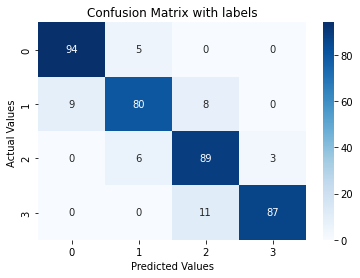

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_predi_test)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [ ]:
important_feature = pd.DataFrame({'Feature' : list(X_train.columns),'Feature Importance' : GBC_clsr.feature_importances_})
important_feature = important_feature.sort_values(by=['Feature Importance'],ascending=False)
important_feature

,Feature,Feature Importance
8,ram,0.799508
0,battery_power,0.106950
6,px_height,0.048853
7,px_width,0.027986
2,int_memory,0.005999
3,mobile_wt,0.004726
9,sc_h,0.001486
1,fc,0.001439
5,pc,0.001080
11,talk_time,0.000960


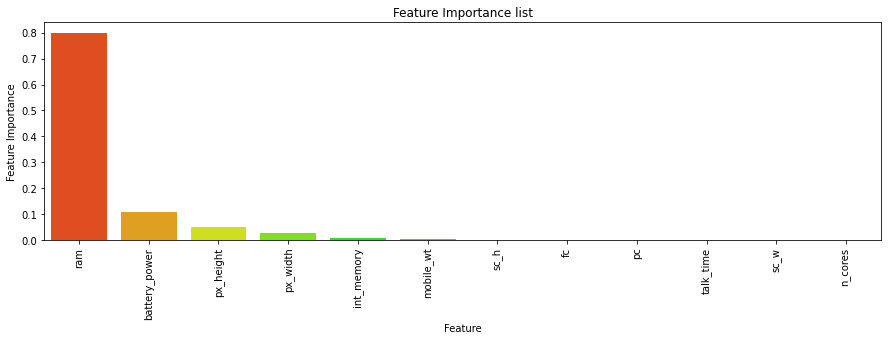

In [ ]:
fig,ax=plt.subplots(figsize=(15,4))
sns.barplot(data = important_feature, palette="gist_rainbow", x='Feature', y='Feature Importance')
ax.set(title='Feature Importance list')
plt.xticks(rotation=90)
plt.show()

**Results:**


1.   The overall accuracy score on our test data is 89%.
2.   Prediction accuracy on Low Cost is 91%.
3.   Prediction accuracy on Medium Cost is 88%.
4.   Prediction accuracy on High Cost is 82%.
5.   Prediction accuracy on Very High Cost is 97%. 

As a result, we can see that Gradient Boosting Classifier has performed good overall, and best in Very High Cost. but in confusion matrix Medium Cost performance not good. 

## **K-Nearest Neighbours Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_clsr = KNeighborsClassifier()
kn_clsr.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
kn_clsr_model_score = kn_clsr.score(X_train,Y_train)
kn_clsr_model_score

0.9539641943734015

In [ ]:
Y_predi_test = kn_clsr.predict(X_test)
Y_predi_train = kn_clsr.predict(X_train)

In [ ]:
kn_clsr_train_score = accuracy_score(Y_train, Y_predi_train)
kn_clsr_train_score

0.9539641943734015

In [ ]:
kn_clsr_test_score = accuracy_score(Y_test, Y_predi_test)
kn_clsr_test_score

0.9260204081632653

In [ ]:
print(classification_report(Y_test, Y_predi_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        99
           1       0.90      0.94      0.92        97
           2       0.87      0.92      0.90        98
           3       0.96      0.91      0.93        98

    accuracy                           0.93       392
   macro avg       0.93      0.93      0.93       392
weighted avg       0.93      0.93      0.93       392



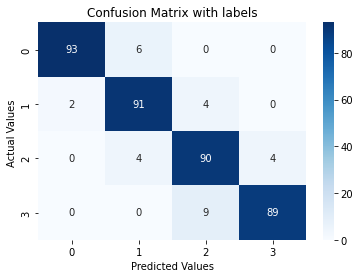

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_predi_test)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

**Results:**


1.   The overall accuracy score on our test data is 92%.
2.   Prediction accuracy on Low Cost is 98%.
3.   Prediction accuracy on Medium Cost is 90%.
4.   Prediction accuracy on High Cost is 87%.
5.   Prediction accuracy on Very High Cost is 96%. 

As a result, we can see K-Nearest Neighbours has performed good overall, and its best are Low Cost and very high Cost.

#**Conclusion**

In [ ]:
table =[{'Model Name':'Decision Tree Classifier',
        'Model_score': classifier_Decision_model_score,
        'Train_score': classifier_Decision_train_score,
        'Test_score': classifier_Decision_test_score,       
        },
        {'Model Name':'Random Forest Classifier',
        'Model_score': classifier_Random_model_score,
        'Train_score': classifier_Random_train_score,
        'Test_score': classifier_Random_test_score,
        },
        {'Model Name':'Hyperparameter tuning with Random forest',
        'Model_score': tunned_rf_model_score,
        'Train_score': tunned_rf_train_score,
        'Test_score': tunned_rf_test_score,
        },
        {'Model Name':'Gradient Boosting Classifier',
        'Model_score': GBC_clsr_model_score,
        'Train_score': GBC_clsr_train_score,
        'Test_score': GBC_clsr_test_score,     
        },
        {'Model Name':'K-Nearest Neighbours Classifier',
        'Model_score': kn_clsr_model_score,
        'Train_score': kn_clsr_train_score,
        'Test_score': kn_clsr_test_score,
        },
        ]
table = pd.DataFrame(table)
table

,Model Name,Model_score,Train_score,Test_score
0,Decision Tree Classifier,1.000000,1.000000,0.859694
1,Random Forest Classifier,1.000000,1.000000,0.913265
2,Hyperparameter tuning with Random forest,1.000000,1.000000,0.918367
3,Gradient Boosting Classifier,0.999361,0.999361,0.892857
4,K-Nearest Neighbours Classifier,0.953964,0.953964,0.926020


**We tried a variety of models, and the table above summarises the results of one set of models.**

**K-Nearest Neighbours and Random Forest Classifier has the best overall accuracy of 92 and 91 percents, respectively.**

**The optimal accuracy for Hyperparameter tunned Random forest, Decision Tree, Gradient Boosting is 91 percent, 85 percent, and 89 percent respectively.**

**However, we'll make  K-Nearest Neighbours as our best model because it provides good overall and individual class accuracy.**


* From EDA, we can observe that there are four different price categories for Mobile phones. 
* Almost the same number of components are present. 
* Half of the phones have Bluetooth, and the other half don’t have Bluetooth 
* As the price range grows, the battery gradually gets bigger. 
* Ram's price range continuously rises as it moves from low to extremely high prices. 
* Expensive phones are weight lesser compare to others 
* The most important factors in determining the price range of a mobile phone were RAM, battery life, and pixels.